**Por: Leonardo Dos Santos Valério**

---
#**Desafio Machine Learning Manipulaê**

**Enunciado:**

O objetivo do teste é prever o valor da coluna "correto" com menor erro possível a partir das outras informações do dataset dos 7121 pontos de dados, podem usar no máximo os primeiros 5121 dados do dataset para prever os últimos 2000.

---

**Descrição da Solução no contexto geral:**

Criarei um Modelo de algoritmo de Regressão Múltipla para criação de um modelo de Machine Learning, assim prevendo com a coeficiente de correlação quais dados estarão mais próximo do resulto da coluna Correta.

#**Importando as bibliotecas principais.**

In [1]:
# Impotamos o pandas para analisar e manipular os dados.
import pandas as pd # Ao importar o pandas damos um apelido (alias) para ele de pd.


# Importamos a biblioteca para criação dos pré-porcessamentos dos dados. 
from sklearn.model_selection import train_test_split


# Importamos a biblioteca para criação do modelo de Machine Leaning de Regressão Múltipla.
from sklearn.linear_model import LinearRegression


# Importamos a biblioteca para realização da métricas de erros
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Impotamos o numpy para estruturação dos dados.
import numpy as np # Ao importar o numpy damos um apelido (alias) para ele de np.


# Importamos a biblioteca matemática para criarmos uma formula mátematica para auxilio da previsão da coluna (Correto).
import math


# Importamos um visualizador de graficos para melhor explicação e compreensão dos dados.
import matplotlib.pyplot as plt # Ao importar o matplotlib.pyplot damos um apelido (alias) para ele de plt.


# Importamos a biblioteca para visualização gráfica e descrição da formula matemática.
import seaborn as sns

#**Tratando os dados e os compreendendo.**

In [2]:
# Criado à variável df (DataFrame) e informamos que recebe o apelido pd e passamos uma função de leitura de arquivo específico no caso csv.
df = pd.read_csv('https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv')


# Solicitamos que mostre as quantidades de linhas e colunas do arquivo csv.
df.shape

(7121, 5)

In [3]:
# Solicitamos para mostrar o DataFrame.
df.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0


In [4]:
# Solicitamos para trazer uma descrição estatística do DataFrame
df.describe()

,qtdInsumos,calculado,correto
count,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798
std,3.194301,191.266516,189.806974
min,1.000000,30.000100,33.000000
25%,1.000000,49.786100,49.500000
50%,2.000000,87.350300,83.100000
75%,4.000000,165.167000,161.200000
max,26.000000,10364.992500,10356.000000


In [5]:
# pedimos para o método info mostrar os tipos de dados e se possui dados nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   descricao   7121 non-null   object 
 1   criado      7121 non-null   object 
 2   qtdInsumos  7121 non-null   int64  
 3   calculado   7121 non-null   float64
 4   correto     7121 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 278.3+ KB


In [6]:
# Realizo a exclusão da Culuna criado, pois fatores de data e hora não vejo correlação para prever a culuna "Correto"
df.drop(columns=['criado', 'descricao'], axis=1, inplace=True)

# Peço para mostrar a exclusão realizada.
df.head(7)

,qtdInsumos,calculado,correto
0,1,47.5297,39.9
1,1,46.9620,43.6
2,3,105.1390,111.4
3,1,49.0314,43.6
4,2,161.8272,146.0
5,1,40.6362,77.0
6,1,35.1005,50.0


In [7]:
# O método corr retorna as correlações já calculdas dos dados, assim temos uma previa da visão das correlações que podera chegar próximo ao
# resultados da coluna 'correta'.
df.corr()

,qtdInsumos,calculado,correto
qtdInsumos,1.000000,0.232302,0.254238
calculado,0.232302,1.000000,0.982201
correto,0.254238,0.982201,1.000000


###**Utilizarei um Coeficiente de Correlação**

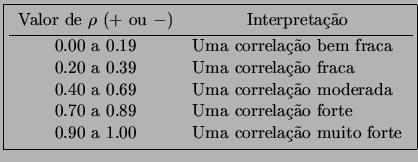


Vale explicar que se no Dataframe craido (df) os valores de corelação forem iniciados com os mesmo números do lado esquerdo (Valor de p) da imagem o mesmo deve ser interpretado no DataFrame como o do lado direito (Interpretação).

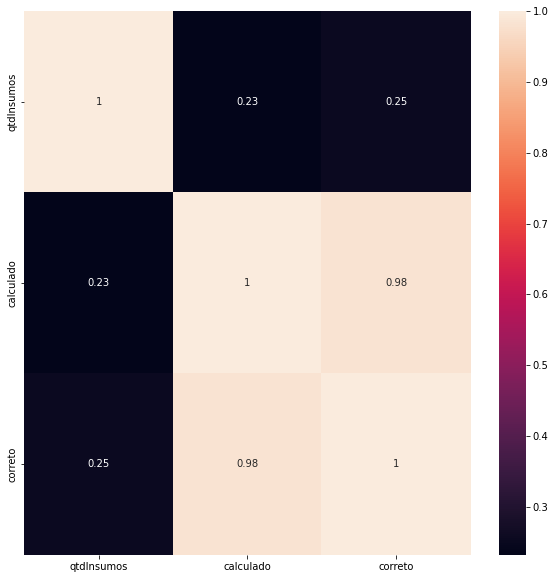

In [8]:
# Grafico de correlações
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

#**Pré-Processamentos dos dados**

In [9]:
# Solicitamos para o DataFrame puxar todas as linhas e que puxe as colunas 0 e 1 que corresponde a qtdInsumo e Calculo.
x = df.iloc[:, [0, 1]].values

# Pedimos para mostrar a quantidade de linhas e colunas que possuí na variável x
x.shape

(7121, 2)

In [10]:
# Solicitamos para o DataFrame puxar todas as linhas e que puxe a coluna 2 que corresponde a correto.

y = df.iloc[:, [2]].values

# Pedimos para mostrar a quantidade de linhas e colunas que possuí na variável y
y.shape

(7121, 1)

In [11]:
# AQui criamos o código para dividirmos as posições X e Y com suas respectivas bases de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 2000, random_state = 1)
x_treino.shape, x_teste.shape

((5121, 2), (2000, 2))

#**Melhoreando a métricas de erros**

Iremos realizar a distribuição dos valore do x_teste para um ajuste melhor do campo de métricas de erros, locazilada mais abaixo.

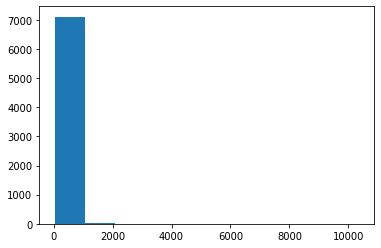

In [12]:
# Solicito que seja criado um gráfico de histograma e que puxe a variável y, assim ele me mostra que ela não esta de forma distribuida
# podendo cousar uma não melhora nas métricas de erros.
plt.hist(y);

In [13]:
# Aplicamos o método do logaritmo para realizar uma distribuição melhor dos dados de y
y = np.log(y)

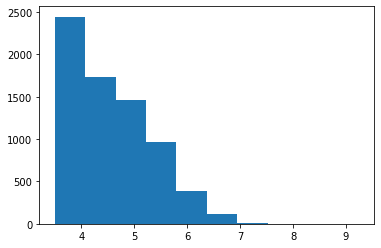

In [14]:
# Apresentamos novamente o gráfico para visualizarmos a distribuição, assim ele terá uma métrica mais 'acertiva' para à coeficiencia das
# correlações dos dados para uma melhor previsão da coluna 'correto'
plt.hist(y);

#**Modelo de Machine Learnig**

In [15]:
# Realizamos a riação do modelo de machine learning e realizamos as adequaações dos dados de  treinos
ml_regressor = LinearRegression()

# O método fit realiza a adequação dos dados para treinamento.
ml_regressor.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#**Métricas de erros**


Utilizarei o Mean Absolute Error para avaliação de métricas de erros, conhecido como MAE, ele realiza o calculo das diferenças absolutas entre as previsões e os valores reais.



In [16]:
# Realizando o calculos da métricas.
previsões = ml_regressor.predict(x_teste)

previsões, y_teste

(array([[ 41.95333489],
        [ 35.81028198],
        [ 30.97911314],
        ...,
        [ 30.02594621],
        [110.660887  ],
        [210.14852379]]), array([[ 39.9],
        [ 39.9],
        [ 39.9],
        ...,
        [ 40. ],
        [ 96.4],
        [209.1]]))

In [17]:
# Verificamos o score dos dados originais.
ml_regressor.score(x_treino, y_treino)

0.9686019335693197

In [18]:
# Verificamos os scores dos dados de teste.
ml_regressor.score(x_teste, y_teste)

0.9512969806552127

In [19]:
# Criado para verificar a diferença absoluta entre os resultados reais da base de teste e a previsões.
previsões = ml_regressor.predict(x_teste)
mean_absolute_error(y_teste, previsões)

13.174898164397561